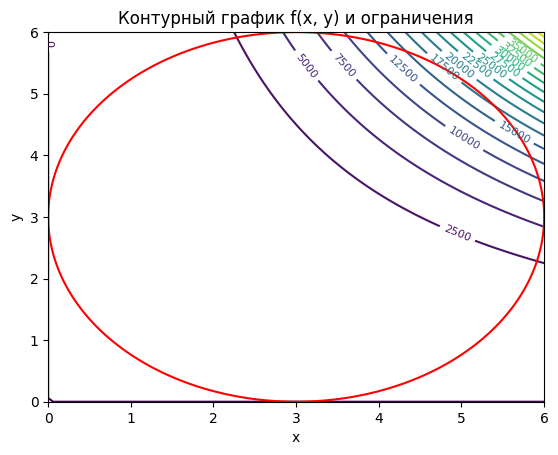

Стационарная точка: x = 0.8786796564403561, y = 0.878679656440359


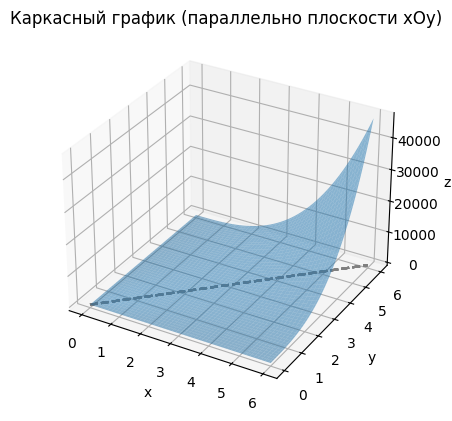

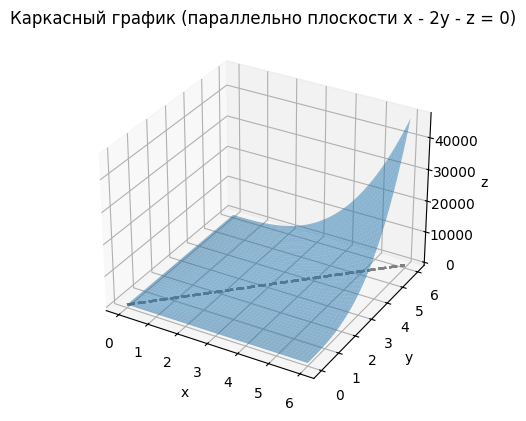

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fsolve

# Определение функции и ограничения
def f(x, y):
  return x**3 * y**3 + 3*x*y

def g(x, y):
  return (x - 3)**2 + (y - 3)**2 - 9

# Создание сетки для графиков
x = np.linspace(0, 6, 100)
y = np.linspace(0, 6, 100)
X, Y = np.meshgrid(x, y)

# Вычисление значений функции и ограничения
Z = f(X, Y)
C = g(X, Y)

# Построение контурных графиков
fig, ax = plt.subplots()
contour = ax.contour(X, Y, Z, levels=20)
circle = ax.contour(X, Y, C, levels=[0], colors='red')
ax.clabel(contour, inline=True, fontsize=8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Контурный график f(x, y) и ограничения')
plt.show()

# Приблизительное определение экстремумов по графику
# (Находим точки пересечения линий уровня функции с окружностью)

# Метод множителей Лагранжа
def lagrange(vars):
  x, y, l = vars
  return [
    3*x**2 * y**3 + 3*y - 2*l*(x - 3),
    3*x**3 * y**2 + 3*x - 2*l*(y - 3),
    (x - 3)**2 + (y - 3)**2 - 9
  ]

# Решение системы уравнений для нахождения стационарных точек
initial_guess = [2, 2, 1]
solution = fsolve(lagrange, initial_guess)
x_s, y_s, l_s = solution
print(f"Стационарная точка: x = {x_s}, y = {y_s}")

# Построение каркасного графика с линиями, параллельными плоскости xOy
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.5)
for i in range(-5, 6):
  ax.plot(x, y, i, color='gray', linestyle='--')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Каркасный график (параллельно плоскости xOy)')
plt.show()

# Построение каркасного графика с линиями, параллельными плоскости x - 2y - z = 0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.5)
for i in range(-5, 6):
  ax.plot(x, y, x - 2*y - i, color='gray', linestyle='--')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Каркасный график (параллельно плоскости x - 2y - z = 0)')
plt.show()